In [1]:
# Anjali - EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# read csv into pandas dataframe
df = pd.read_csv('ted_main/ted_main.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [3]:
# make separate dataframe called ratings_df for the 14 different ratings given
r = []
num_ratings = []
for x in range(2550):
    dict_rating = {}
    num_ratings = 0
    ratings = eval((df.ratings[x]))
    for i in ratings:
        num_ratings+=i['count']
        dict_rating[i['name']] = i['count']
    dict_rating['Total'] = num_ratings
    r.append(dict_rating)
ratings_df = pd.DataFrame(r)

In [4]:
# displaying top 5 values for each column in ratings_df
ratings_df.head()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,Total
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413,2936
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230,2824
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3728
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25620


In [5]:
# getting statistics for columns in ratings_df
ratings_df.describe()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,Total
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,154.468627,192.293725,150.739608,164.723529,32.683922,20.955294,348.013333,314.164314,52.767843,220.086275,148.057647,81.238039,26.001176,530.214902,2436.408235
std,589.137728,477.375664,283.800437,433.805453,41.608618,31.552561,540.225980,624.535809,91.678632,466.774759,553.879757,90.321214,53.443249,1314.509665,4226.795631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,68.000000
25%,8.000000,26.000000,26.000000,20.000000,9.000000,5.000000,99.250000,79.000000,12.000000,37.000000,18.250000,32.000000,6.000000,113.000000,870.750000
50%,21.000000,68.000000,69.000000,51.000000,19.000000,12.000000,212.000000,162.000000,27.000000,97.000000,42.000000,55.500000,13.000000,233.500000,1452.500000
75%,92.000000,190.750000,170.750000,149.000000,41.000000,24.000000,401.000000,344.000000,60.000000,225.750000,110.750000,99.000000,27.000000,497.750000,2506.750000
max,19645.000000,9437.000000,6073.000000,8668.000000,447.000000,531.000000,9787.000000,14447.000000,2194.000000,10704.000000,14728.000000,1341.000000,1361.000000,24924.000000,93850.000000


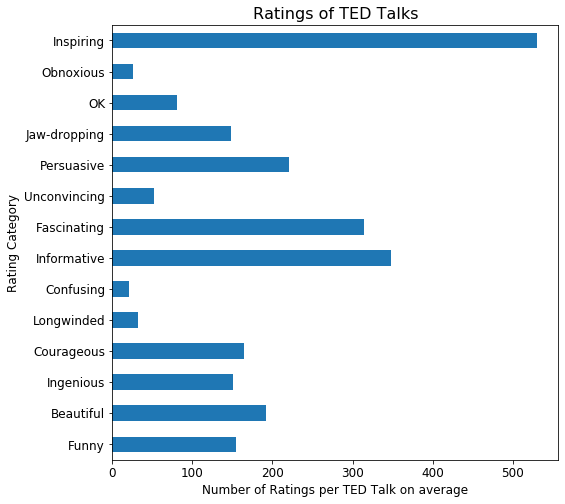

In [6]:
# displaying average number of ratings for each adjective
columns = [column for column in ratings_df.columns if column!= 'Total']
df2 = ratings_df[columns]
(df2.sum()/2550).plot(kind='barh', figsize=(8,8), fontsize=12)
plt.xlabel('Number of Ratings per TED Talk on average', fontsize=12)
plt.title("Ratings of TED Talks", fontsize=16)
plt.ylabel('Rating Category', fontsize=12)
plt.show()

Text(0, 0.5, 'Number of Talks')

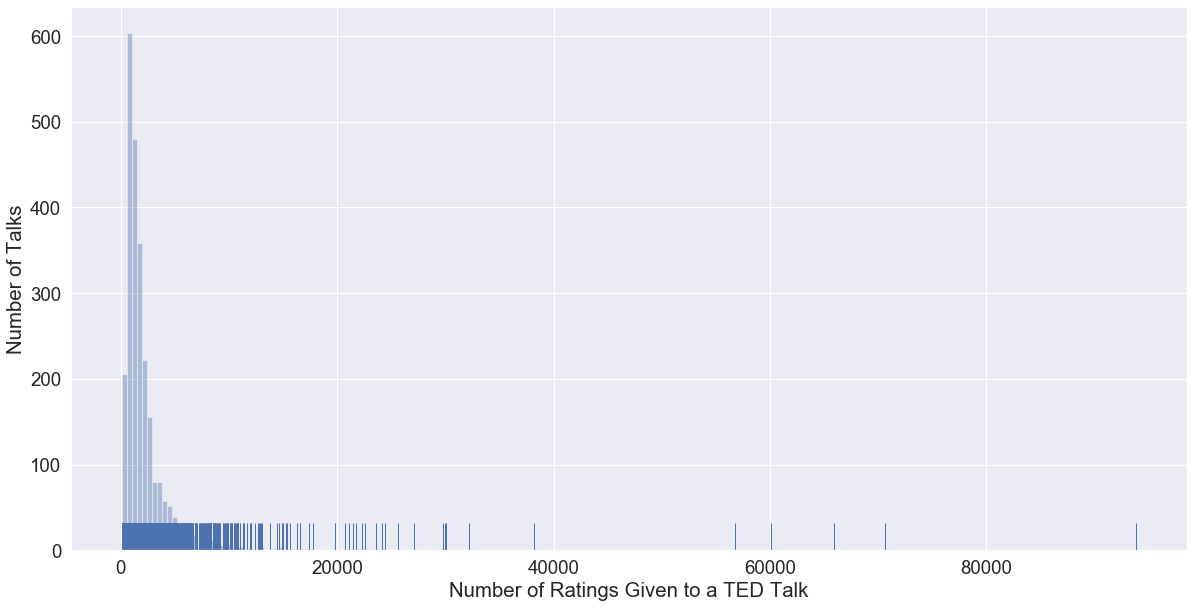

In [7]:
# Distribution of Number of Ratings for each TED talk
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.7)
sns.distplot(ratings_df["Total"], rug=True, bins=200, kde=False)
plt.xlabel("Number of Ratings Given to a TED Talk")
plt.ylabel("Number of Talks")
# Only a few talks have above 50,000 ratings

In [8]:
#Talks with more than 50,000 ratings
for i in range(2550):
    if (ratings_df['Total'][i]>50000):
        print(df['title'][i])

Do schools kill creativity?
My stroke of insight
How great leaders inspire action
The power of vulnerability
Your body language may shape who you are


Text(0, 0.5, 'Number of Talks')

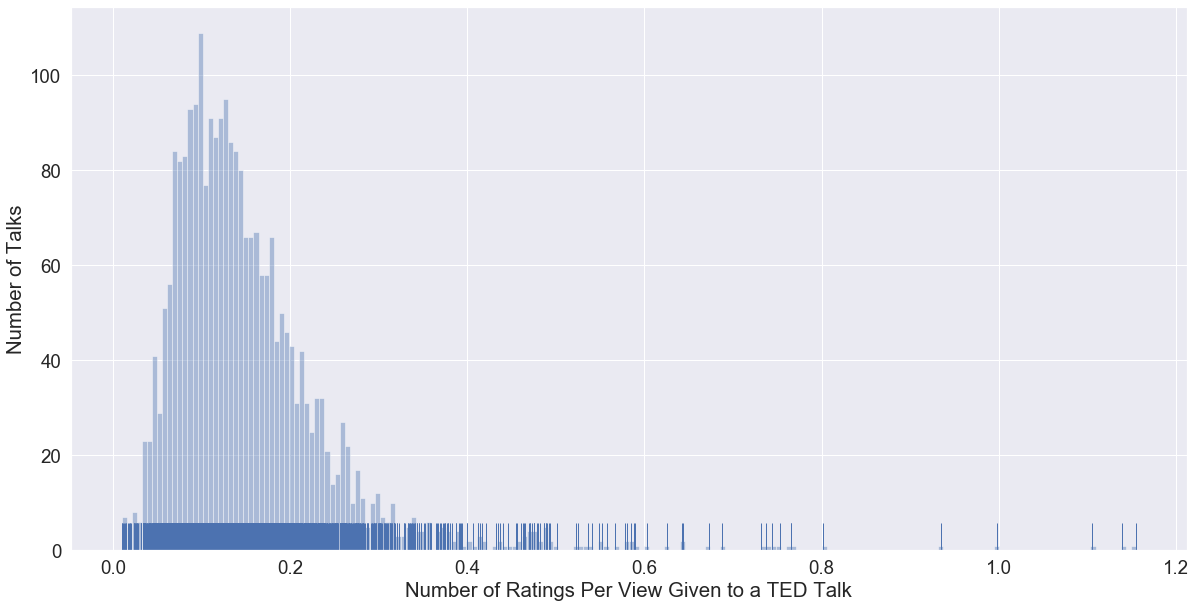

In [9]:
# Distribution of Percentage of Number of Ratings per view for each TED talk
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.7)
sns.distplot(ratings_df["Total"]/df['views']*100, rug=True, bins=200, kde=False)
plt.xlabel("Number of Ratings Per View Given to a TED Talk")
plt.ylabel("Number of Talks")
# Only few talks have above 0.8% ratings per view for the talk

In [10]:
#Talks with more than 0.8% ratings/views and their themes
topics = []
for i in range(2550):
    if (ratings_df['Total'][i]/df['views'][i]>0.008):
        print(df['title'][i])
        topics.extend(eval(df['tags'][i]))

print("\nThese above talks represent the issues that people want to really talk and debate about:\n") 
print("TOPICS: ", set(topics))

The case for same-sex marriage
A message to gay teens: It gets better
Transplant cells, not organs
Building a park in the sky
What happens when an NGO admits failure
Why gun violence can't be our new normal

These above talks represent the issues that people want to really talk and debate about:

TOPICS:  {'God', 'humanity', 'religion', 'public spaces', 'government', 'social change', 'choice', 'parenting', 'society', 'technology', 'Debate', 'sex', 'TEDx', 'cities', 'children', 'big problems', 'global issues', 'Guns', 'culture', 'global development', 'marketing', 'policy', 'activism', 'future', 'business', 'love', 'law', 'TEDYouth', 'goal-setting', 'LGBT', 'architecture', 'violence', 'community', 'engineering'}


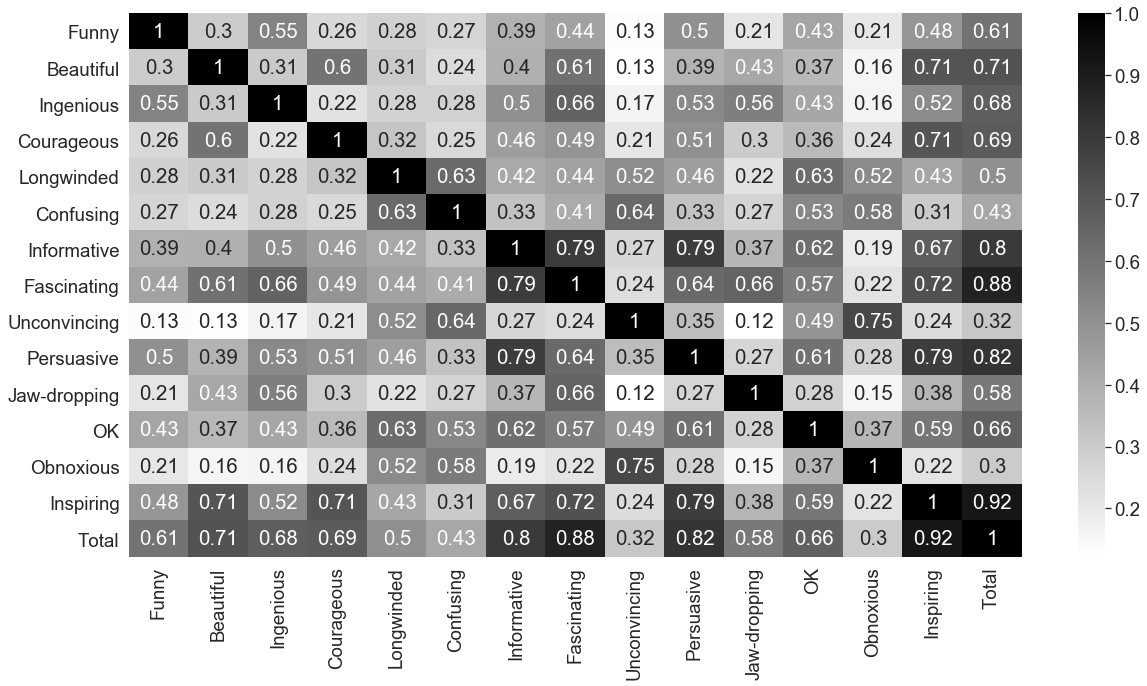

In [11]:
sns.heatmap(ratings_df.corr(), annot=True, cmap="binary")

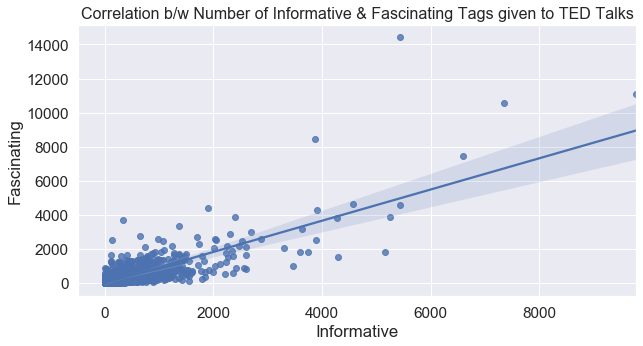

R VALUE IS: 0.7919806863928543 




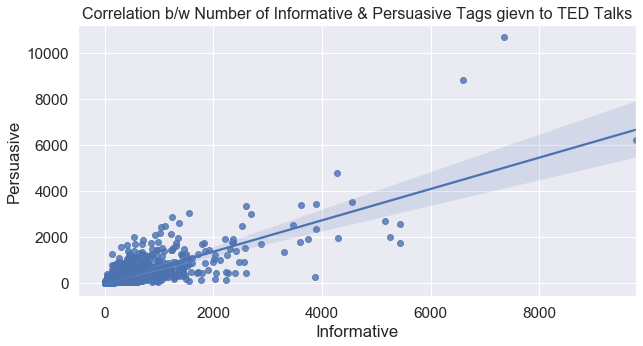

R VALUE IS: 0.7900094418121837 




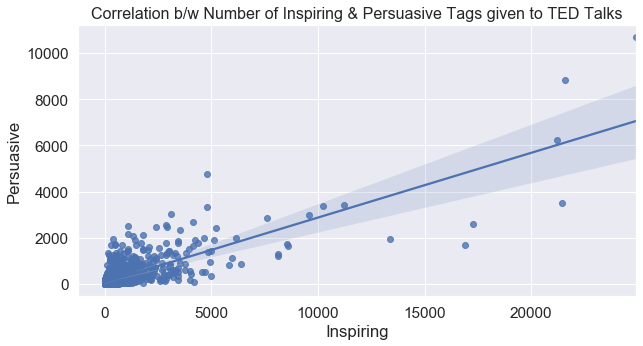

R VALUE IS: 0.7897634415601141 




In [12]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.4)

ax = sns.regplot(ratings_df["Informative"], ratings_df["Fascinating"])
plt.title("Correlation b/w Number of Informative & Fascinating Tags given to TED Talks", fontsize=16)
plt.show()
print("R VALUE IS:",ratings_df['Informative'].corr(ratings_df['Fascinating']), "\n\n")

ax = sns.regplot(ratings_df["Informative"], ratings_df["Persuasive"])
plt.title("Correlation b/w Number of Informative & Persuasive Tags gievn to TED Talks", fontsize=16)
plt.show()
print("R VALUE IS:",ratings_df['Informative'].corr(ratings_df['Persuasive']), "\n\n")

ax = sns.regplot(ratings_df["Inspiring"], ratings_df["Persuasive"])
plt.title("Correlation b/w Number of Inspiring & Persuasive Tags given to TED Talks", fontsize=16)
plt.show()
print("R VALUE IS:",ratings_df['Inspiring'].corr(ratings_df['Persuasive']), "\n\n")

In [13]:
df.tags.value_counts()[0:10]

['live music', 'music', 'performance']                                   3
['art', 'creativity']                                                    3
['entertainment', 'live music', 'music', 'performance']                  3
['mission blue', 'oceans', 'science', 'technology']                      2
['design', 'entertainment', 'live music', 'music', 'technology']         2
['TEDx', 'inequality', 'race', 'social change', 'society']               2
['culture', 'love', 'relationships', 'sex']                              2
['culture', 'technology']                                                2
['creativity', 'entertainment', 'live music', 'music', 'performance']    2
['business', 'technology']                                               2
Name: tags, dtype: int64

In [14]:
# Extracting TED initiatives tags - TEDx, TED Books, TED Fellows, ....

ted_init = []
general = []

for i in range(2550):
    if 'TED' in df.tags[i]:
        for name in eval(df.tags[i]):
            if "TED" in name:
                ted_init.append(name)
            else:
                general.append(name)
    else:
        general.extend(eval(df.tags[i]))

ted_init = pd.Series(ted_init)
print(ted_init.value_counts())

TEDx               450
TED Fellows        143
TED Brain Trust     49
TED Prize           27
TEDYouth            24
TEDNYC              19
TEDMED              19
TED Books           17
TED en Español      12
TED-Ed              11
TED Residency        6
dtype: int64


Text(0, 0.5, 'Tag Name')

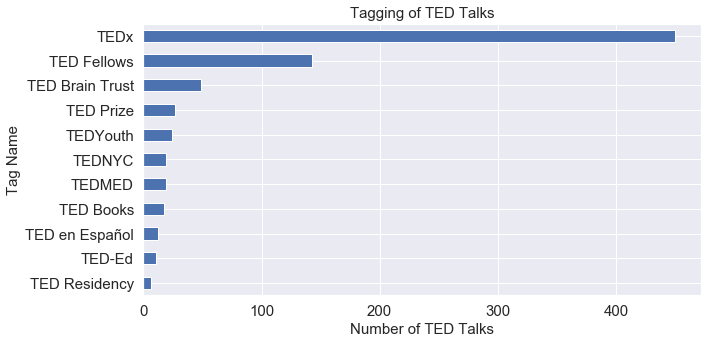

In [15]:
# representation of TED initiative tags

ted_init.value_counts(ascending=True).plot(kind='barh', fontsize=15)
plt.xlabel('Number of TED Talks', fontsize=15)
plt.title("Tagging of TED Talks", fontsize=15)
plt.ylabel('Tag Name', fontsize=15)

In [16]:
# get general themes
general = pd.Series(general)
print(general.value_counts()[0:10])

technology       727
science          567
global issues    501
culture          486
design           418
business         348
entertainment    299
health           236
innovation       229
society          224
dtype: int64


Text(0, 0.5, 'Tag Name')

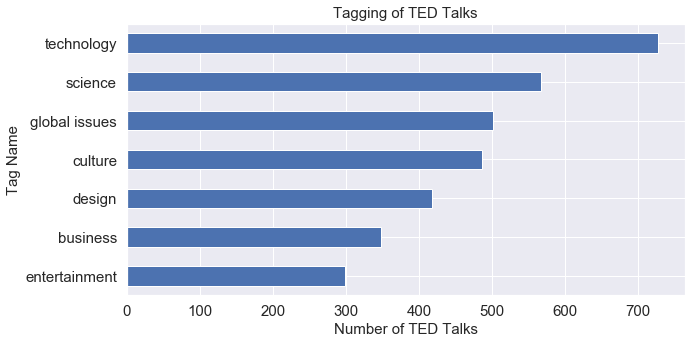

In [17]:
# get general themes present in more than 10% of talks, i.e. 255
df_tags_top_10 = general.value_counts(ascending=True)[general.value_counts(ascending=True)>255]
df_tags_top_10.plot(kind='barh', fontsize=15)
plt.xlabel('Number of TED Talks', fontsize=15)
plt.title("Tagging of TED Talks", fontsize=15)
plt.ylabel('Tag Name', fontsize=15)

In [18]:
# titles of TED talks containing all top 3 topics - 24 talks
for i in range(2550):
    if 'technology' in df.tags[i] and 'science' in df.tags[i] and 'global issues' in df.tags[i]:
        print(df.title[i])

Averting the climate crisis
My wish: Help me stop pandemics
Chemical scum that dream of distant quasars
My wish: Build the Encyclopedia of Life
Swim with the giant sunfish
Luke, a new prosthetic arm for soldiers
10 ways the world could end
A critical look at geoengineering against climate change
On the verge of creating synthetic life
6 ways mushrooms can save the world
Solving medical mysteries
Let my dataset change your mindset
Time-lapse proof of extreme ice loss
Innovating to zero!
How web video powers global innovation
Look up for a change
A test for Parkinson's with a phone call
Re-engineering mosquitos to fight disease
Your kids might live on Mars. Here's how they'll survive
A forgotten Space Age technology could change how we grow food
A young scientist's quest for clean water
Help discover ancient ruins -- before it's too late
Adventures of an asteroid hunter
A secret weapon against Zika and other mosquito-borne diseases
